# <center style="color:#cd3635"> Compte rendu TP2 Analyse numérique : Interpolation Numérique </center>


# Exercice1:

## Polynome d'interpolation de Lagrange:

Soient $(x_0,y_0), \ldots,(x_k,y_k),\ldots ,(x_n,k_n)$ $n+1$ points deux à deux distincts, le polynôme d'interpolation de Lagrange associés à ces points supports est défini par :$$P_n(x)=\sum_{k=0}^{n-1} y_kL_k(x)$$

avec $L_{0}(x)=\displaystyle\frac{(x-x_1)(x-x_2)\ldots(x-x_{n})}{(x_0-x_1)(x_0-x_2)\ldots(x_0-x_{n})}$ et $L_{k}(x)=\displaystyle\frac{(x-x_1)(x-x_2)\ldots(x-x_{k-1})(x-x_{k+1})\ldots(x_0-x_{n})}{(x_k-x_0)(x_k-x_1)\ldots(x_k-x_{k-1})(x_k-x_{k+1})\ldots(x_k-x_{n})}$ pour $k\in \{1,\ldots,n\}$

In [2]:
from numpy import prod
def PR(x,y,c) :
    L = [] 
    S = []
    n = len(x)
    s=y
    for j in range (n):
        L =[c-i for i in x]
        for k in range (n):
            if (k == j):
                L[k] = 1
            else:
                L[k] = L[k]/(x[j] - x[k])
        S.append(y[j]*prod(L))

    return sum(S)

In [3]:
X=[15,1,2,3,4];
Y=[30,-1,0,2,1];
for i in X:
    print(PR(X,Y,i))
sum(X)

30.0
-1.0
0.0
2.0
1.0


25

1) La fonction PR lorsqu'on lui déclare x=(x(1),x(2),...,x(n))x=(x(1),x(2),...,x(n)) et y=(y(1),y(2),...,y(n))y=(y(1),y(2),...,y(n)) deux vecteurs de même longueur n et c un nombre réel donné,elle renvoie le vecteur $Y=f(x)$

In [4]:
x=[1,2,3,4]
y=[-1,0,2,1]

In [5]:
def PR2 (x,y,c):
    S = []
    n = len(x)
    for c in X:
        for j in range (n):
            L =[c-xx for xx in x]
            for k in range (n):
                if (k == j):
                    L[k]= 1
                else:
                    L[k] = L[k]/(x[j] - x[k])
            S.append(y[j]*prod(L))
     
    
 
        return L[3]


In [6]:
for i in x:
    print(PR2(x,y,i))

1
1
1
1


2) après la fin de la boucle kk, le vecteur LL contient la base de polynôme d'interpolation de Lagrange
$ {L0(x), L1(x), L2(x),L3(x)} $ au points $(x0,y0), (x1,y1), (x2,y2), (x3,y3)$



3) Utilisation de la fonction PR pour dessiner le graph du polynôme de Lagrange de la fonction $f(x) = \dfrac{1}{1 + x^2}$ aux points $x=[-1:0.1:1]$ :

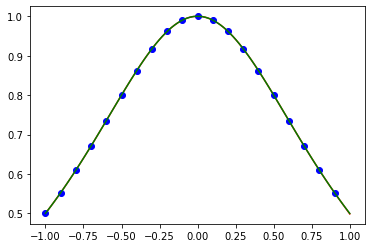

In [7]:
import numpy as np
import matplotlib.pyplot as plt
x=np.arange(-1,1,0.1)
pt=[]
f=lambda x: 1/(1+x**2)
y=f(x)

t=np.linspace(-1,1,100)
for u in  range(len(t)):
    
    pt.append(PR(x,y,t[u]))

plt.plot(t,pt,'r',x,y,'bo',t,f(t),'g')
plt.show()

4) On considère la fonction $F$ suivante :$$
F(h) = \pi -\cos \left(\frac{h}{2}\right) + h \sqrt{1-\left(\frac{h}{2}\right)^2}, \qquad
h\in [0,2],
$$et les points d'interpolation $x_i = ih$, $0\leq i\leq n$, avec $ n=20$ et $h=0.1$.

4.1) Représentation sur le même graphe la fonction $F$ et $p_n$, où $p_n$ est le polynôme d'interpolation de Lagrange de $F$ aux points $x_0,\,\ldots,\,x_n$.

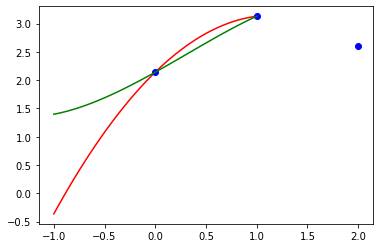

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import math
pt=[]
x=np.arange(0,3)
f= lambda x:math.pi-math.cos(x/2)+x*math.sqrt(1-(x/2)**2)
f_2=np.vectorize(f)
y=f_2(x)
t=np.linspace(-1,1,100)
for i in range(len(t)):
    pt.append(PR(x,y,t[i]))
plt.plot(t,pt,"r",x,y,"bo",t,f_2(t),"g")
plt.show()

2)Tracage de la courbe d'erreur (la fonction $F-p_n$).

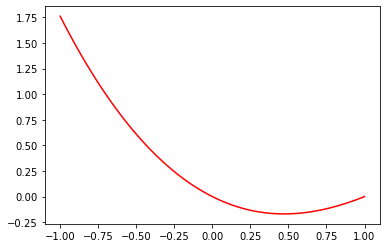

In [9]:
plt.plot(t,f_2(t)-pt,"r")
plt.show()

#  Exercice2:(Phénomène de Runge)

1) Vérification sur $[-5,5]$ le polynôme d'interpolation de Lagrange de la fonction $f$ définie par $f(x)=\displaystyle{\frac{1}{1+x^2}}$, en $N$ points uniformément espacés ne convergent pas correctement aux voisinages de $-1$ et $1$, pour $N=7,8,9,10 ...$

Text(0.5, 1.0, 'Interpolation Equidistante avec N=7')

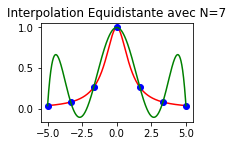

In [10]:
import numpy as np
import matplotlib.pyplot as plt
N=7
X=np.linspace(-5,5,N)
f=lambda x: 1/(1+x**2)
Y=f(X)
p=np.polyfit(X,Y,N-1)
t=np.linspace(-5,5,1000)
plt.subplot(2,2,1)
plt.plot(t,f(t),'r',X,Y,'ob', t, np.polyval(p,t),'g')
plt.title("Interpolation Equidistante avec N=7")

Text(0.5, 1.0, 'Interpolation Equidistante avec N=8')

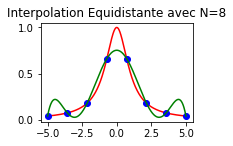

In [11]:
N=8
X=np.linspace(-5,5,N)
f=lambda x: 1/(1+x**2)
Y=f(X)
p=np.polyfit(X,Y,N-1)
t=np.linspace(-5,5,1000)
plt.subplot(2,2,2)
plt.plot(t,f(t),'r',X,Y,'ob', t, np.polyval(p,t),'g')
plt.title("Interpolation Equidistante avec N=8")

Text(0.5, 1.0, 'Interpolation Equidistante avec N=9')

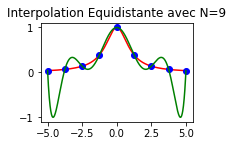

In [12]:
N=9
X=np.linspace(-5,5,N)
f=lambda x: 1/(1+x**2)
Y=f(X)
p=np.polyfit(X,Y,N-1)
t=np.linspace(-5,5,1000)
plt.subplot(2,2,3)
plt.plot(t,f(t),'r',X,Y,'ob', t, np.polyval(p,t),'g')
plt.title("Interpolation Equidistante avec N=9")

Text(0.5, 1.0, 'Interpolation Equidistante avec N=10')

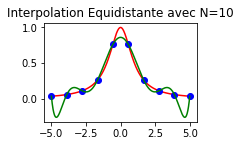

In [13]:
N=10
X=np.linspace(-5,5,N)
f=lambda x: 1/(1+x**2)
Y=f(X)
p=np.polyfit(X,Y,N-1)
t=np.linspace(-5,5,1000)
plt.subplot(2,2,4)
plt.plot(t,f(t),'r',X,Y,'ob', t, np.polyval(p,t),'g')
plt.title("Interpolation Equidistante avec N=10")

2) Les points de Tchebycheff sur un intervalle $[a;b]$ sont définie par :$$x_k=\dfrac{a+b}{2}+\dfrac{a-b}{2}\cos\left(\frac{k-1}{n-1}\pi\right)\hspace{0.5cm} (k=1,..,n: x_1=a:x_n=b)$$

Vérification sur $[-5; 5]$ ; l'interpolation polynômiale de $f(x) = \dfrac{1}{1 + x^2}$ ; en $N$ points de Tchebychev est meilleure qu'une interpolation utilisant $N$ points uniforment espacés (on prendra $N=10, 11, 16, 17$).


In [14]:
def tcheb(a,b,n):
    v=[]
    for k in range(n):
        v.append((a+b)/2+(a-b)/2*math.cos((k-1)/(n-1)*math.pi))
    return v

In [15]:
tcheb(-5,5,11)

[-4.755282581475767,
 -5.0,
 -4.755282581475767,
 -4.045084971874737,
 -2.938926261462366,
 -1.5450849718747373,
 -3.061616997868383e-16,
 1.5450849718747368,
 2.938926261462365,
 4.045084971874736,
 4.755282581475767]

C:\Users\yesmin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5, 1.0, 'Interpolation Tchebycheff avec N=10')

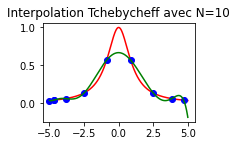

In [16]:
import numpy as np
import matplotlib.pyplot as plt
N=10
Yt=[]
f= lambda x:1/(1+x**2)
Xt=tcheb(-5,5,N)
for i in Xt:
    Yt.append(f(i))
pt=np.polyfit(Xt,Yt,N-1)
plt.subplot(2,2,1)
plt.plot(t,f(t),'r',Xt,Yt,'ob', t, np.polyval(pt,t),'g')
plt.title("Interpolation Tchebycheff avec N=%i"%N)

C:\Users\yesmin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5, 1.0, 'Interpolation Tchebycheff avec N=11')

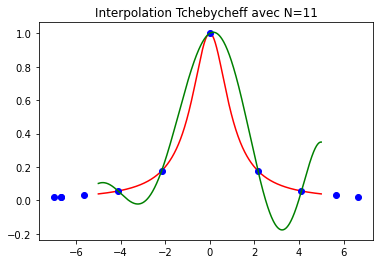

In [17]:
N=11
Yt=[]
f= lambda x:1/(1+x**2)
Xt=tcheb(-7,7,N)
for i in Xt:
    Yt.append(f(i))
pt=np.polyfit(Xt,Yt,N)
plt.plot(t,f(t),'r',Xt,Yt,'ob', t, np.polyval(pt,t),'g')
plt.title("Interpolation Tchebycheff avec N=%i"%N)

C:\Users\yesmin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5, 1.0, 'Interpolation Tchebycheff avec N=11')

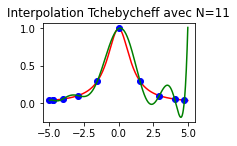

In [18]:
N=11
Yt=[]
f= lambda x:1/(1+x**2)
Xt=tcheb(-5,5,N)
for i in Xt:
    Yt.append(f(i))
pt=np.polyfit(Xt,Yt,N-1)
plt.subplot(2,2,2)
plt.plot(t,f(t),'r',Xt,Yt,'ob', t, np.polyval(pt,t),'g')
plt.title("Interpolation Tchebycheff avec N=%i"%N)

C:\Users\yesmin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5, 1.0, 'Interpolation Tchebycheff avec N=16')

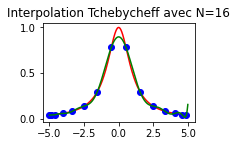

In [19]:
N=16
Yt=[]
f= lambda x:1/(1+x**2)
Xt=tcheb(-5,5,N)
for i in Xt:
    Yt.append(f(i))
pt=np.polyfit(Xt,Yt,N-1)
plt.subplot(2,2,3)
plt.plot(t,f(t),'r',Xt,Yt,'ob', t, np.polyval(pt,t),'g')
plt.title("Interpolation Tchebycheff avec N=%i"%N)


C:\Users\yesmin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5, 1.0, 'Interpolation Tchebycheff avec N=17')

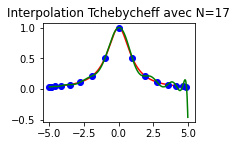

In [20]:
N=17
Yt=[]
f= lambda x:1/(1+x**2)
Xt=tcheb(-5,5,N)
for i in Xt:
    Yt.append(f(i))
pt=np.polyfit(Xt,Yt,N-1)
plt.subplot(2,2,4)
plt.plot(t,f(t),'r',Xt,Yt,'ob', t, np.polyval(pt,t),'g')
plt.title("Interpolation Tchebycheff avec N=%i"%N)

#  Exercice3:

In [21]:
def intN(x,y):
    m=len(x)
    f=np.zeros(m)
    for k in range(1,m):
        f[k:m+1]=np.array(np.array(y[k:m+1])-np.array(y[k-1:m-1]))/np.array(np.array(x[k:m+1])-np.array(x[0:m-k]))
    return f


In [22]:
x=[-1,0,2,5]
y=[6,1,3,66]
intN(x,y)

array([ 0.        , -5.        ,  0.66666667, 10.5       ])

In [23]:
def intNval(x,y,t):
    m=len(x)
    p=y[m-1]*np.ones(len(t))
    for k in range(m-2,-1,-1):
        p=p*np.array((np.array(t)-x[k]))+y[k]
    return p


In [24]:
x=[-1,0,2,5]
y=[6,1,3,66]
t=[0,1,2,3]
intNval(x,y,t)

array([   7., -118.,   27.,  838.])

# 2)


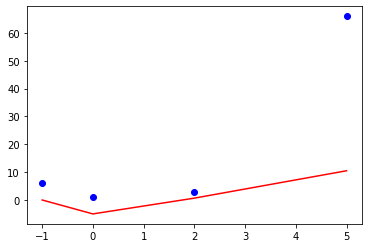

In [25]:
x=[-1,0,2,5]
y=[6,1,3,66]
f=intN(x,y)
plt.plot(x,f,'r',x,y,'ob')
plt.show()


# 3)

In [26]:
x=[-1,0,2,5]
y=[6,1,3,66]
t=[0,1,2,3]
p=intNval(x,y,t)
p[0]

7.0

# 4) Recalcul de $P(1)$ :

$ x=[-1,0,2,5]$
$y=[6,1,3,66]$
$t=[0,1,2,3]$

$p(1)= (t[1]-x[1])+y[1] = (0-(-1))+6 = 1+6 =7 $